# Maths Overview

Trivially, notebooks provide us with a simple editing environment for combining markdown text, simple inline LaTeX and LateX blocks, and code cells prefixed with the `%%latex` block cell magic.

This also us to notebooks a medium for creating content blends narrative text with mathematical notation.

```{note}
Within a notebook user interface, native support for LaTeX inline in markdown cells is limited to that subset of LaTeX that can be parsed by the MathJax parser.

LaTeX parsing magics and code output transclusion can be used to provide access to a full featured LaTeX parser.
```

In addition, code cells allow us to perform mathematical computations and generate graphical outputs.

In a complete one piece generative document flow publishing system where we guarantee the correctness of calculations and formal arguments, as wel as the correctness of output graphics in relation to the body of the content, we ideally need to find a way to relate the (symobolic) mathematical content to the code that is executed.

Using a symbolic maths package such as `sympy`, we can create symbolic computational expressions that can be used to calculate (compute) expressions at a symbolic level as well as rendering those expressions in mathematical form using LaTeX (Mathjax). For rendering integrated one piece content in Jupyter book, the Python `myst_nb.glue()` provides a means for inline code outputs, biut this requires a Pyhton kernel. For bookdown workflows, outputs from all supported languages can be inlined [ *TO DO — CHECK* ].

If tight integration with the text is not required, or if markdown output can be generated from code, computation using a wide range of other languages can is enabled by isntallig the appropriate Jupyter kernel ([curated list of Jupyter kernels](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)). For example, several kernels are avaialble that are particularly suited to a rand of mathematics related activities such as statistical computing, symbolic maths and numerical computation. For example:

- [`R`](https://irkernel.github.io/) statistical computing and graphics;
- [`Stata`](https://github.com/TiesdeKok/ipystata) statistical computing;
- [`SageMath`](https://doc.sagemath.org/html/en/installation/launching.html#setting-up-sagemath-as-a-jupyter-kernel-in-an-existing-jupyter-notebook-or-jupyterlab-installation) computer algebra system;
- [`Maxima`](https://github.com/robert-dodier/maxima-jupyter) computer algebra system;
- [`Octave`](https://github.com/Calysto/octave_kernel) numerical computation;
- [`SciLab`](https://github.com/calysto/scilab_kernel) numerical computation;
- [*Matlab*](https://github.com/calysto/matlab_kernel) mathematical computing;
- [*Wolfram Language*](https://github.com/WolframResearch/WolframLanguageForJupyter) mathematical computing;
- [`Gnuplot`](https://github.com/has2k1/gnuplot_kernel) charts.


```{note}
We can also write markdown in a code cell by converting to the code cell to a *de facto* markdown cell using the `%%markdown` block magic.
```

## Rendering equations Using MathJax
Equations can be rendered as a block using MathJax in a markdown cell.

\begin{align}
\sqrt{3x-1}+(1+x^2)
\end{align}

See this third party [Typesetting Equations](https://nbviewer.jupyter.org/github/ipython/ipython/blob/4.0.x/examples/Notebook/Typesetting%20Equations.ipynb) demonstration notebook for further examples.

MathJax content can also be rendered inline. For example, we can include the expression  $\sqrt{3x-1}+(1+x^2)$ embedded *within* a line of text.

## Embedding LaTex / TikZ Graphical Outputs

We can use the [`ipython_magic_tikz`](https://github.com/innovationOUtside/ipython_magic_tikz) magic to provide access to a TikZ/LaTeX parser to allow us to generate diagrams from [TikZ](https://www.overleaf.com/learn/latex/TikZ_package)) scripts.

In [4]:
#%pip install git+https://github.com/innovationOUtside/ipython_magic_tikz.git
%load_ext tikz_magic

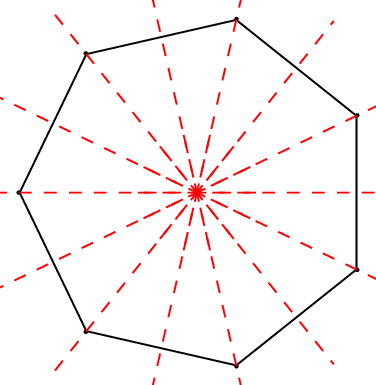

In [9]:
%%tikz
\usetikzlibrary{shapes.geometric, calc}
\def\numsides{7} % regular polygon sides
\node (a) 
[draw,  blue!0!black,rotate=90,minimum size=3cm,regular polygon, regular polygon sides=\numsides] at (0, 0) {}; 

\foreach \x in {1,2,...,\numsides}
  \fill (a.corner \x) circle[radius=.5pt];
  \foreach \x in {1,2,...,\numsides}{
  \draw [red,dashed, shorten <=-0.5cm,shorten >=-0.5cm](a.center) -- (a.side \x);
  \draw [red,dashed, shorten <=-0.5cm,shorten >=-0.5cm](a.center) -- (a.corner \x);}